In [29]:
import pandas as pd
import numpy as np
import json
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob

pd.options.display.max_rows = 200

sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

# 1. Load raw data

In [30]:
df_messages = pd.read_csv('/gh/data/personal-data-requests/linkedin/messages.csv', parse_dates=['DATE']).sort_values('DATE')
df_messages.loc[[321]]

,FROM,TO,DATE,SUBJECT,CONTENT,DIRECTION,FOLDER
321,Scott Cole,NaN,2012-02-07 12:47:54,Scott Cole invites you to join Clemson Univers...,I would like to invite you to join my group on...,OUTGOING,SENT


In [31]:
df_contacts = pd.read_csv('/gh/data/personal-data-requests/linkedin/Contacts.csv', parse_dates=['CreatedAt']).sort_values('CreatedAt')
df_contacts.loc[[337]]

,Source,FirstName,LastName,Companies,Title,Emails,PhoneNumbers,CreatedAt,Addresses,Sites,InstantMessageHandles,FullName,Birthday,Location,BookmarkedAt,Profiles
337,GOOGLE_CONTACTS,NaN,NaN,NaN,NaN,aice@clemson.edu,NaN,2012-03-10 07:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_connections = pd.read_csv('/gh/data/personal-data-requests/linkedin/Connections.csv', parse_dates=['Connected On']).sort_values('Connected On')
df_connections.loc[[93]]

,First Name,Last Name,Email Address,Company,Position,Connected On
93,Jared,Brooks,NaN,Insight Data Science,Data Science Fellow,2019-01-30


In [33]:
df_searches = pd.read_csv('/gh/data/personal-data-requests/linkedin/SearchQueries.csv', parse_dates=['Time']).sort_values('Time')
df_searches.loc[[83]]

,Time,Search Query
83,2017-10-18 00:11:32,crime lab new york


In [34]:
df_invitations = pd.read_csv('/gh/data/personal-data-requests/linkedin/Invitations.csv').sort_values('Sent At').reset_index(drop=True)
df_invitations.loc[[0]]

,From,To,Sent At,Message,Direction
0,Scott Cole,Brian Lin,"1/31/19, 4:07 PM",NaN,OUTGOING


# 2. Connections' jobs

### 2a. most popular companies

In [35]:
df_connections['Company'].value_counts().head(10)

Samba TV                              25
Insight Data Science                  22
Clemson University                    20
University of California San Diego     5
UC San Diego                           5
Amazon                                 3
W. L. Gore & Associates                3
Gentner Lab, UC San Diego              2
Facebook                               2
Google                                 2
Name: Company, dtype: int64

### 2b. parse position

In [36]:
ordered_keyword_to_category = [('data scien', 'data scientist'),
                                ('graduate', 'grad student'),
                                ('ph.d', 'grad student'),
                                ('phd', 'grad student'),
                                ('professor', 'professor'),
                                ('lecturer', 'professor'),
                                ('chair', 'professor'),
                                ('postdoc', 'research'),
                                ('research', 'research'),
                                ('scientist', 'research'),
                                ('engineer', 'engineer'),
                                ('developer', 'engineer'),
                                ('manager', 'manager'),
                                ('analyst', 'analyst'),
                                ('consult', 'consulting'),
                                ('marketing', 'business'),
                                ('business', 'business'),
                                ('partner', 'business'),
                                ('health', 'healthcare'),
                                ('clinic', 'healthcare'),
                                ('doctor', 'healthcare'),
                                ('physician', 'healthcare')]

def get_job_category(title):
    for (k, v) in ordered_keyword_to_category:
        if k in title:
            return v

df_connections2 = df_connections.dropna(subset=['Position'])
df_connections2['job_category'] = df_connections2['Position'].str.lower().apply(get_job_category)

/Users/scott/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


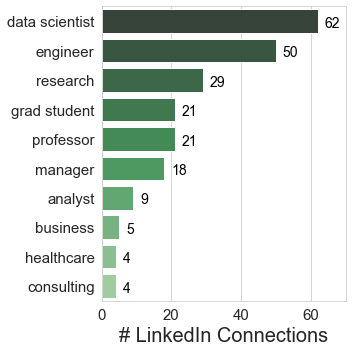

In [37]:
# Prep data to plot
df_plt = df_connections2.copy()
df_plt = df_plt['job_category'].value_counts().reset_index().rename(columns={'index': 'job_category', 'job_category': 'count'})

# Plot bars
plt.figure(figsize=(5,5))
g=sns.barplot(x='count', y='job_category', data=df_plt,
              palette=sns.color_palette('Greens_d', n_colors=len(df_plt)))

# Plot numbers
for index, row in df_plt.iterrows():
    g.text(x=row['count'] + 2,
           y=index + .2,
           s=row['count'],
           color='black',
           ha="left",
           size=14)

plt.ylabel('')
plt.xlabel('# LinkedIn Connections')
plt.xlim((0,70))
plt.tight_layout()
    
plt.savefig('/gh/srcole.github.io/assets/personaldata/linkedin_connection_categories.png')

# NOTE: this would be better if I used information from the company
* Get a sense of industry too